In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from nltk import sent_tokenize
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from kneed import KneeLocator

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
qbank = pd.read_csv("/content/drive/Shareddrives/Data Fest 2023/data/answered_merged_questions.csv")
attorney_cat_count = pd.read_csv("/content/drive/Shareddrives/Data Fest 2023/data/attorney_cat_count.csv")
unanswered_q = pd.read_csv("/content/drive/Shareddrives/Data Fest 2023/data/nan_MergedQuestions.csv")
qbank = qbank[['QuestionUno', 'PostText', "TakenByAttorneyUno"]]
qbank

,QuestionUno,PostText,TakenByAttorneyUno
0,B7C95D50-6C81-4E61-BC16-81077B7D3F7E,Do you still need help with this issue? It ha...,0293D737-A73B-47D8-8D26-FE5AB33F67E1
1,F3A78AD3-D3D4-447F-BEAF-F62F1D1D4CCE,"Yes, those are the right forms. I'm sorry, I ...",C4EA5672-72E4-47CD-A4C2-E4A7C874E40A
2,5F8506D3-D9F1-48EE-8081-D30259DBF4E8,"Hi ###,You do make some good points. The diff...",C4EA5672-72E4-47CD-A4C2-E4A7C874E40A
3,350684F5-99F0-4CC1-81D3-AAE531DDB1DB,I called T-Mobile and asked to get a copy of t...,C4EA5672-72E4-47CD-A4C2-E4A7C874E40A
4,43DDB903-B9AE-4086-84B1-58CAFF869460,My niece ### Web was in a car accident she was...,BD0270C5-FC74-4321-941B-89F7FFD43DF2
...,...,...,...
106601,DC4952A1-2508-4ABD-9C23-80C6362FCB87,I made ###. The first order arrived and I assu...,66ACB2C6-B4B5-4015-AE1A-4D1E08D17860
106602,A9C002F9-BFCD-4E6B-AC4A-EA60357DBDA1,I am filing for Chapter ###. I live with my M...,66ACB2C6-B4B5-4015-AE1A-4D1E08D17860
106603,B1E8E1D9-12A0-477C-869F-93792E6098D0,"To Whom It May Concern,My deceased father was ...",66ACB2C6-B4B5-4015-AE1A-4D1E08D17860
106604,D1CD238C-4216-4F3D-BFB4-3C8D28C3B8C6,Divorce decree went into affect ######6. Respo...,85C0CADA-3E7F-4BE1-B852-DE1D58E7E02F


In [ ]:
unanswered_q['PostText'][6512]

'I applied for a loan modification was told that the underwriter approved and it went off to the ### for final sign off. When calling I asked if they knew what the new terms were and they said no not really but it looked like they were going to ask for a down payment amt of maybe $### ###. I said when wud the down payment have to be made they said not sure upto the ### and I said hypothetically what wud happen if one ### not come up with all those funds in a short period of time. Response was we would more than likely determine the amt you were able to make and ask the ### for approval or more time to make the down payment. I was calling 3x a day asking for updates. I was told once they signed off we were given ###. I called yesterday early afternoon for update and and I was told the file was denied and closed because we could not come up with the downpayment. I was what are you talking about we did not even see the terms, know what the down payment was and Yes I can come up with the d

In [ ]:
def find_cat_attorney(target, compare_database):
  target = target["Category"]
  subset_data = compare_database[compare_database['Category'] == target]
  sorted_subset_data = subset_data.sort_values(by = ['count'], ascending = False)
  return sorted_subset_data.head()

In [ ]:
attorney_cat_count

,AttorneyUno,Category,count
0,000B021F-9FBF-4058-8ADC-D0A6232B6C04,Housing and Homelessness,1
1,0023FF7C-934D-4974-87A9-B90BE52D4D5B,Family and Children,3
2,003C4876-C682-4E94-B161-4BE4B5AD0FBD,Family and Children,1
3,00401285-58EE-4E39-9807-87A570C4B9ED,Family and Children,3
4,00609EE0-87BE-496A-9847-A711F4569A25,Family and Children,4
...,...,...,...
12289,FFC66FAF-38C4-4520-88DE-19BBD7BF5F26,"Work, Employment and Unemployment",1
12290,FFD551B4-3BB5-4C00-9714-032776657EC0,Family and Children,4
12291,FFD551B4-3BB5-4C00-9714-032776657EC0,"Work, Employment and Unemployment",1
12292,FFDDF712-4C58-4DB5-A63E-99355C6448A0,Family and Children,2


In [ ]:
attorney_cat = find_cat_attorney(unanswered_q.iloc[6512], attorney_cat_count)
attorney_cat

,AttorneyUno,Category,count
1991,27B73590-F3A5-47DD-A226-B7CD58751722,Health and Disability,61
5880,775743CD-AE89-4866-A5A3-0DDEF53E619F,Health and Disability,48
11336,EBB7B7CE-7372-4DDF-8135-EB7AD00517F5,Health and Disability,37
8879,B68EB95B-020E-48C0-9B8F-D45BC98A27B7,Health and Disability,35
5642,735D4273-3EAC-4C2A-AF1C-F1BCFAFFEED8,Health and Disability,34


In [ ]:
# target = unanswered_q['PostText'][6512]
# compare_database = list(qbank["PostText"])

def find_attorney(target, compare_database):
  target = target['PostText']
  vectorizer = TfidfVectorizer()

  # To make uniformed vectors, both documents need to be combined first.
  compare_database.insert(0, target)
  embeddings = vectorizer.fit_transform(compare_database)

  cosine_similarities = cosine_similarity(embeddings[0:1], embeddings[1:]).flatten()
  qbank1 = qbank
  qbank1["scores"] = cosine_similarities
  qbank1 = qbank1.sort_values(by = ['scores'], ascending = False)

  return qbank1


In [ ]:
results = find_attorney(unanswered_q.iloc[6512], list(qbank["PostText"]))
attorney_most_sim = results.head()
attorney_most_sim

,QuestionUno,PostText,TakenByAttorneyUno,scores
77968,40D3EDE1-5882-4ED5-A439-E3C10EF38D1E,"My vehicle was repossessed, I did fall behind ...",5972BC62-120C-475A-B045-A74EA9FFFEDD,0.349322
52814,BC3CF395-9DA9-4B1F-93D6-FF2E2657E75D,Can I go after dealer for double the down paym...,2E774E9E-E601-4BB6-8668-E26E09615F35,0.340682
26079,CF66A3B4-A444-42B6-8E69-8DAB426A5583,I just recently closed on a contract for deed ...,53779F6D-8FAF-4B9C-A5D5-AE1AEBDE10C4,0.337067
105374,64A0E250-89E2-4D88-9687-03ECF254BC56,Do I have any options on stopping a put out or...,C170D8A8-A984-45BD-BD90-35DDE32E5978,0.334809
103211,B9A9D1EC-A226-4E3F-B5F0-B004D68680B0,HelloI took out a loan maybe a year or so ago ...,F7E9C10C-2FDA-464C-B579-E5CE07C2498D,0.331775


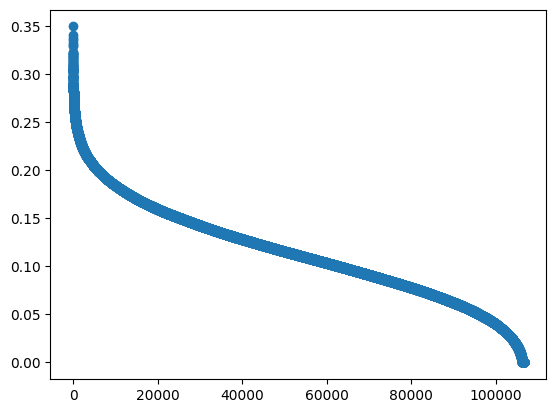

In [ ]:
plt.scatter(range(106606), y = results["scores"])
k1 = KneeLocator(range(106606), results["scores"], curve = 'convex', direction = 'decreasing')

In [ ]:
threshold = results.iloc[k1.elbow]['scores']
results_top = results[results["scores"]>threshold]
attorney_most_xp = results_top.groupby("TakenByAttorneyUno").count().sort_values(by = ['scores'], ascending = False).head()
pd.DataFrame(attorney_most_xp["QuestionUno"])

,QuestionUno
TakenByAttorneyUno,
775743CD-AE89-4866-A5A3-0DDEF53E619F,51
59C1710C-0D02-4D34-BE10-E87A4D0F315E,41
FA34142B-1575-4720-981C-2D28C3560137,23
05DD8A38-5C07-4796-8ED5-699E05424614,23
34322290-1BBC-42BA-B351-76029E9E6F9D,17


In [ ]:
recs = pd.DataFrame()
df1 = pd.DataFrame(list(attorney_most_xp.index))
df2 = pd.DataFrame(list(attorney_most_sim["TakenByAttorneyUno"]))
df3 = pd.DataFrame(list(attorney_cat["AttorneyUno"]))
recs["AttorneyUno"] = pd.concat([df1,df2,df3])
recs.groupby(["AttorneyUno"])
recs = recs.reset_index().drop(columns = "index")
recs = pd.DataFrame(recs.groupby('AttorneyUno').size())
recs.sort_values(by = 0, ascending = False)

,0
AttorneyUno,
775743CD-AE89-4866-A5A3-0DDEF53E619F,2
05DD8A38-5C07-4796-8ED5-699E05424614,1
27B73590-F3A5-47DD-A226-B7CD58751722,1
2E774E9E-E601-4BB6-8668-E26E09615F35,1
34322290-1BBC-42BA-B351-76029E9E6F9D,1
53779F6D-8FAF-4B9C-A5D5-AE1AEBDE10C4,1
5972BC62-120C-475A-B045-A74EA9FFFEDD,1
59C1710C-0D02-4D34-BE10-E87A4D0F315E,1
735D4273-3EAC-4C2A-AF1C-F1BCFAFFEED8,1
